# Import needed modules

In [1]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.1 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 19.3 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 46.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Att

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


# Data Preprocessing

**Read data and store it in dataframe**

In [4]:
train_dir = '/kaggle/input/100-bird-species/train'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [5]:
train_df

filepaths             labels
0      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
1      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
2      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
3      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
4      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
...                                                  ...                ...
84630  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
84631  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
84632  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
84633  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
84634  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE

[84635 rows x 2 columns]

In [6]:
valid_dir = '/kaggle/input/100-bird-species/valid'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)

In [7]:
valid_df

filepaths             labels
0      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
1      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
2      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
3      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
4      /kaggle/input/100-bird-species/train/DALMATIAN...  DALMATIAN PELICAN
...                                                  ...                ...
84630  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
84631  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
84632  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
84633  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE
84634  /kaggle/input/100-bird-species/train/GOLDEN EA...       GOLDEN EAGLE

[84635 rows x 2 columns]

In [8]:
# Generate  test data paths with labels
test_dir = '/kaggle/input/100-bird-species/test'
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [9]:
test_df

filepaths             labels
0     /kaggle/input/100-bird-species/test/DALMATIAN ...  DALMATIAN PELICAN
1     /kaggle/input/100-bird-species/test/DALMATIAN ...  DALMATIAN PELICAN
2     /kaggle/input/100-bird-species/test/DALMATIAN ...  DALMATIAN PELICAN
3     /kaggle/input/100-bird-species/test/DALMATIAN ...  DALMATIAN PELICAN
4     /kaggle/input/100-bird-species/test/DALMATIAN ...  DALMATIAN PELICAN
...                                                 ...                ...
2620  /kaggle/input/100-bird-species/test/GOLDEN EAG...       GOLDEN EAGLE
2621  /kaggle/input/100-bird-species/test/GOLDEN EAG...       GOLDEN EAGLE
2622  /kaggle/input/100-bird-species/test/GOLDEN EAG...       GOLDEN EAGLE
2623  /kaggle/input/100-bird-species/test/GOLDEN EAG...       GOLDEN EAGLE
2624  /kaggle/input/100-bird-species/test/GOLDEN EAG...       GOLDEN EAGLE

[2625 rows x 2 columns]

#### 

**Create image data generator**

In [10]:
# crobed image size
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)
valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 84635 validated image filenames belonging to 525 classes.
Found 84635 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.


**Show sample from train data**

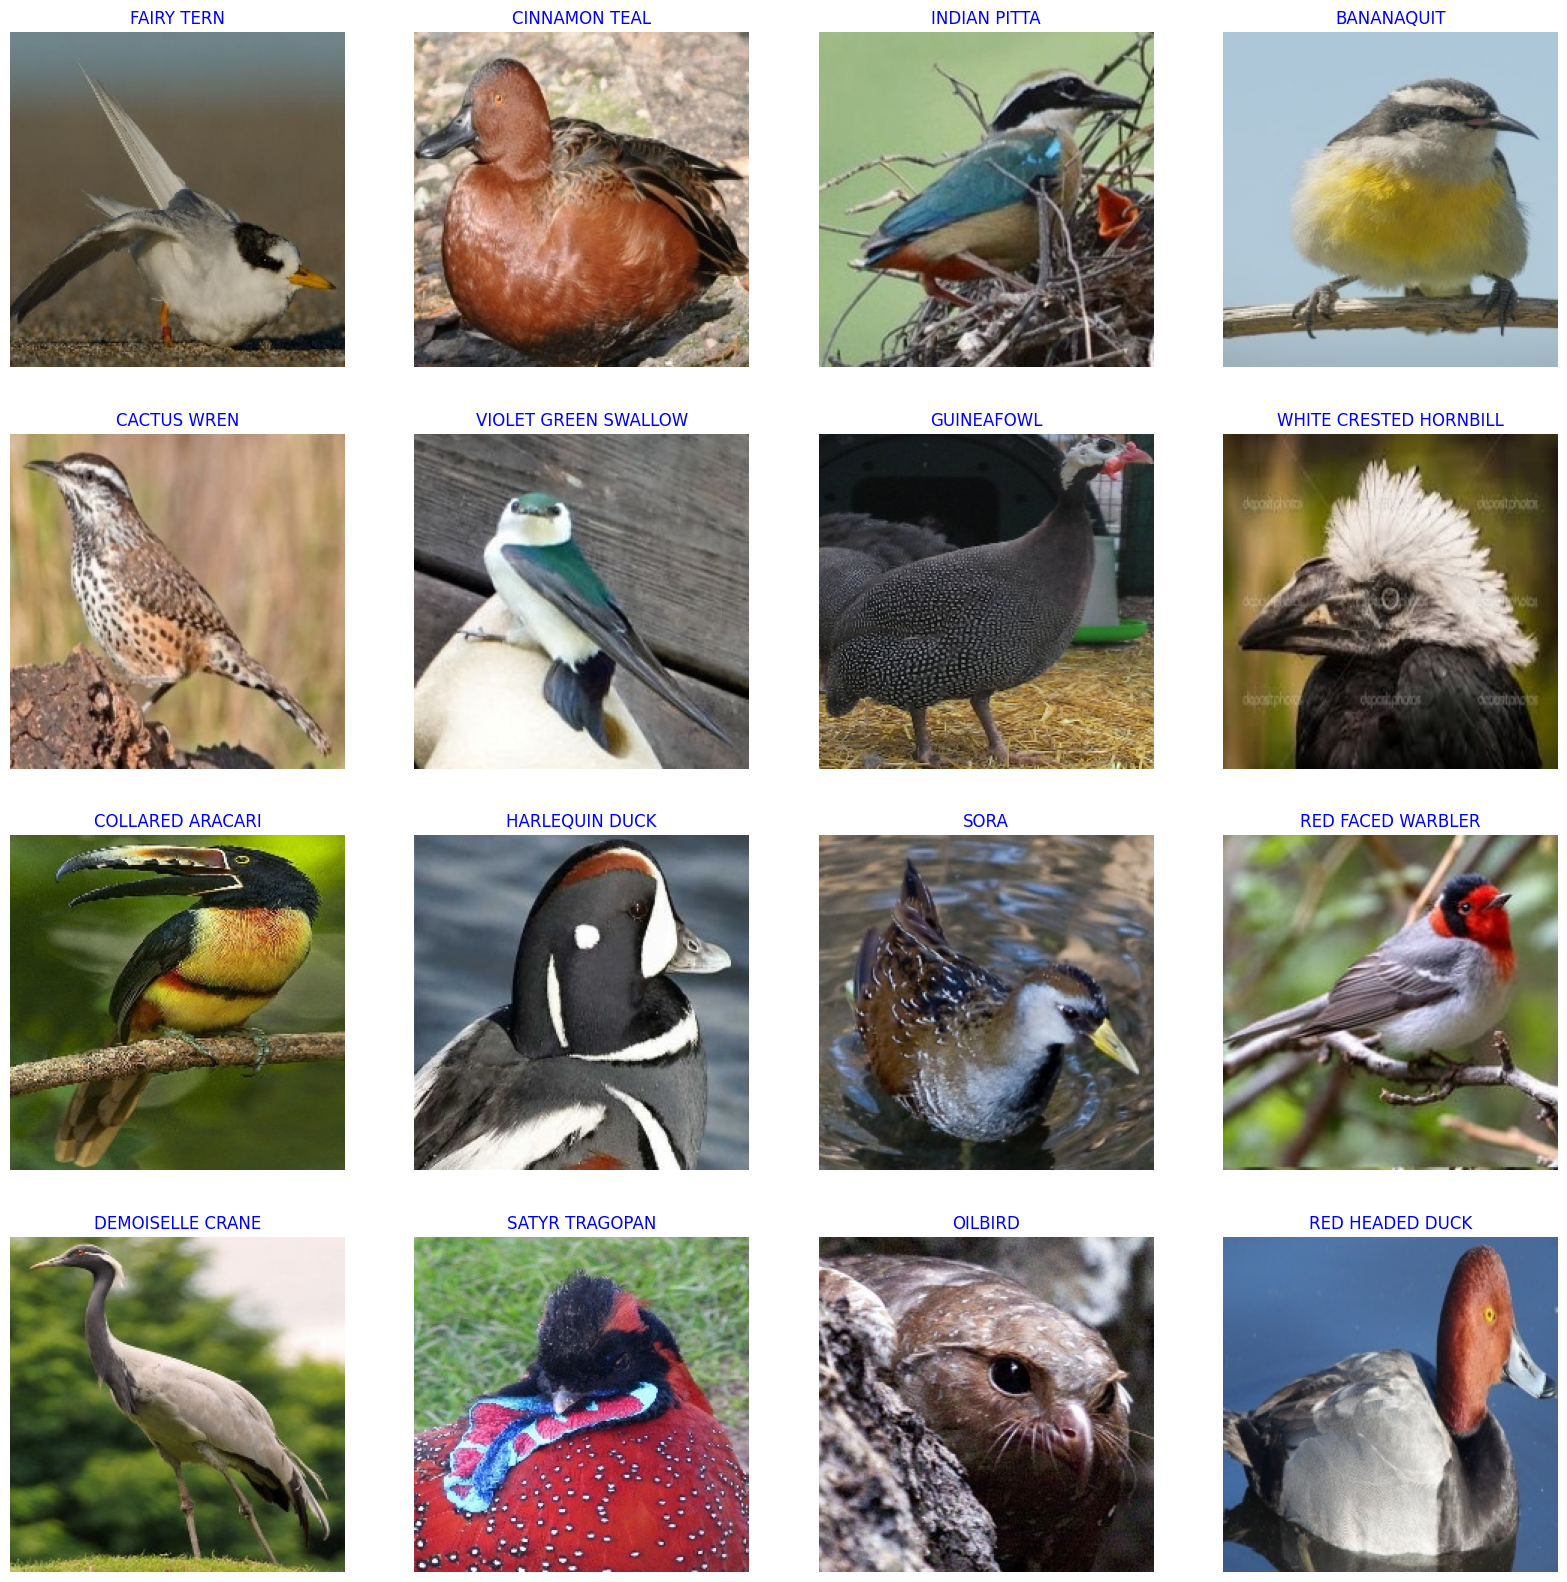

In [11]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# Model Structure

**Generic Model Creation**

In [12]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 525)               134925    
                                                                 
Total params: 4,517,552
Trainable params: 4,472,969
Non-t

**Train model**

In [14]:
batch_size = 32   # set batch size for training
epochs =  10  # number of all epochs in training
history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/10
2645/2645 [==============================] - 748s 283ms/step - loss: 0.6723 - accuracy: 0.9811 - val_loss: 0.5514 - val_accuracy: 0.9950
Epoch 2/10
2645/2645 [==============================] - 736s 278ms/step - loss: 0.6149 - accuracy: 0.9840 - val_loss: 0.5048 - val_accuracy: 0.9959
Epoch 3/10
2645/2645 [==============================] - 720s 272ms/step - loss: 0.5654 - accuracy: 0.9863 - val_loss: 0.4619 - val_accuracy: 0.9969
Epoch 4/10
2645/2645 [==============================] - 753s 285ms/step - loss: 0.5224 - accuracy: 0.9885 - val_loss: 0.4413 - val_accuracy: 0.9972
Epoch 5/10
2645/2645 [==============================] - 766s 290ms/step - loss: 0.4900 - accuracy: 0.9893 - val_loss: 0.4194 - val_accuracy: 0.9982
Epoch 6/10
2645/2645 [==============================] - 729s 276ms/step - loss: 0.4574 - accuracy: 0.9914 - val_loss: 0.3939 - val_accuracy: 0.9982
Epoch 7/10
2645/2645 [==============================] - 730s 276ms/step - loss: 0.4333 - accuracy: 0.9915 - val_

**Display model performance**

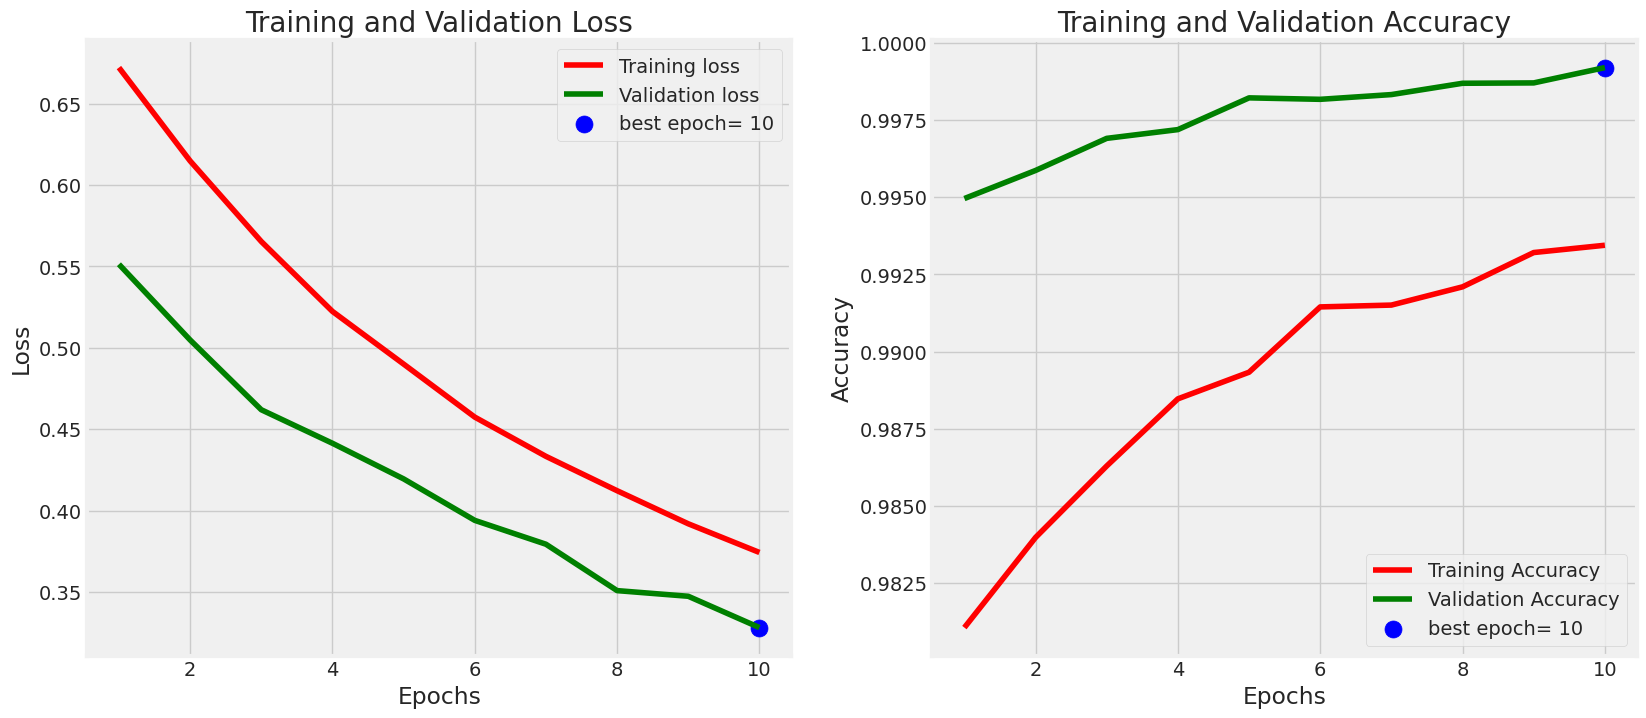

In [15]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

# Evaluate model

In [16]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

35/35 [==============================] - 10s 298ms/step - loss: 0.3455 - accuracy: 0.9920
Train Loss:  0.327874094247818
Train Accuracy:  0.9991071224212646
--------------------
Validation Loss:  0.32764068245887756
Validation Accuracy:  0.9991071224212646
--------------------
Test Loss:  0.34549152851104736
Test Accuracy:  0.9919642806053162


**Get Predictions**

In [17]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

**Confusion Matrics and Classification Report**

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [18]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                               precision    recall  f1-score   support

              ABBOTTS BABBLER       1.00      1.00      1.00         5
                ABBOTTS BOOBY       1.00      0.60      0.75         5
   ABYSSINIAN GROUND HORNBILL       1.00      0.80      0.89         5
        AFRICAN CROWNED CRANE       1.00      1.00      1.00         5
       AFRICAN EMERALD CUCKOO       1.00      1.00      1.00         5
            AFRICAN FIREFINCH       1.00      1.00      1.00         5
       AFRICAN OYSTER CATCHER       1.00      1.00      1.00         5
        AFRICAN PIED HORNBILL       1.00      1.00      1.00         5
          AFRICAN PYGMY GOOSE       1.00      1.00      1.00         5
                    ALBATROSS       1.00      1.00      1.00         5
               ALBERTS TOWHEE       1.00      1.00      1.00         5
         ALEXANDRINE PARAKEET       1.00      1.00      1.00         5
                ALPINE CHOUGH       1.00      1.00      1.00         5
     

**Save model**

In [27]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('efficientnet.tflite', 'wb') as f:
    f.write(tflite_model)

In [19]:
#Save the model
model.save('model.h5')

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# Prediction using loaded_model

In [12]:
loaded_model = tf.keras.models.load_model('/kaggle/input/models/model.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [13]:
image_path = '/kaggle/input/100-bird-species/test/ALPINE CHOUGH/4.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

1/1 [==============================] - 2s 2s/step
ALPINE CHOUGH


In [22]:
def pre(img_path, model):
    image = Image.open(img_path)

    # Preprocess the image
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    predictions = model.predict(img_array)
    class_labels = classes
    score = tf.nn.softmax(predictions[0])
    print(f"{class_labels[tf.argmax(score)]}")

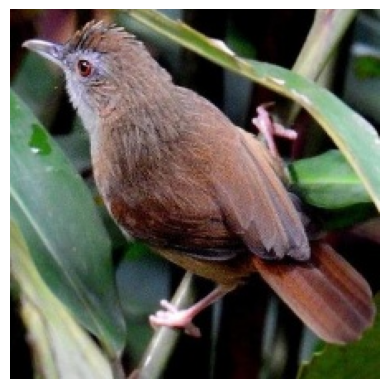

1/1 [==============================] - 0s 99ms/step
Predicted class: ABBOTTS BABBLER
Confidence: 0.52%


In [14]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

def pre(img_path, model, classes):
    image = Image.open(img_path)

    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    # Preprocess the image
    img = image.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    predictions = model.predict(img_array)
    class_labels = classes
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_labels[tf.argmax(score)]
    confidence = 100 * tf.reduce_max(score)

    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

# Example usage:
# Assuming 'model' and 'classes' are defined elsewhere
img_path = '/kaggle/input/100-bird-species/test/ABBOTTS BABBLER/1.jpg'
pre(img_path, loaded_model, classes)

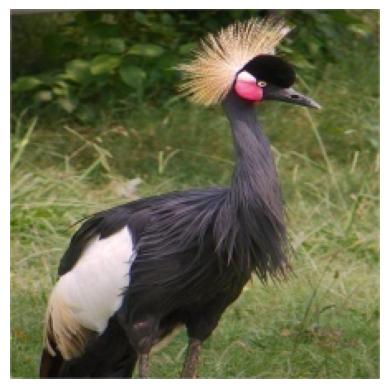

1/1 [==============================] - 0s 88ms/step
Predicted class: AFRICAN CROWNED CRANE
Confidence: 0.52%


In [15]:
pre('/kaggle/input/100-bird-species/test/AFRICAN CROWNED CRANE/3.jpg', loaded_model, classes)

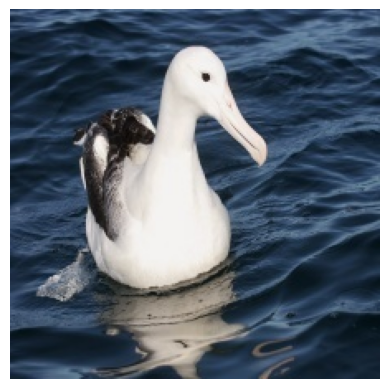

1/1 [==============================] - 0s 71ms/step
Predicted class: ALBATROSS
Confidence: 0.52%


In [16]:
pre('/kaggle/input/100-bird-species/test/ALBATROSS/2.jpg', loaded_model, classes)

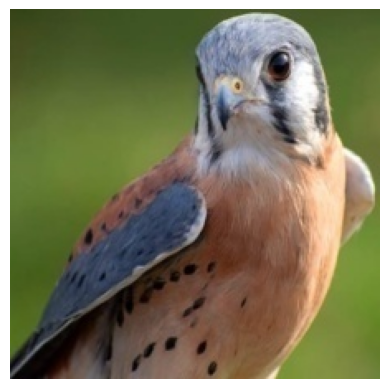

1/1 [==============================] - 0s 86ms/step
Predicted class: AMERICAN KESTREL
Confidence: 0.52%


In [17]:
pre('/kaggle/input/100-bird-species/test/AMERICAN KESTREL/3.jpg', loaded_model, classes)

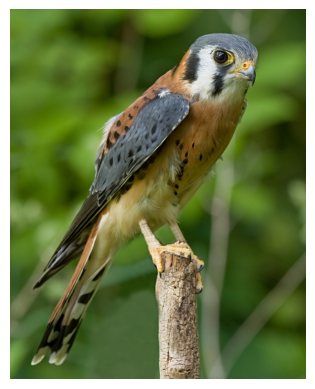

1/1 [==============================] - 0s 86ms/step
Predicted class: AMERICAN KESTREL
Confidence: 0.51%


In [18]:
pre('/kaggle/input/americankestrel/AmericanKestrel02.jpg', loaded_model, classes)

In [23]:
pre('/kaggle/input/100-bird-species/test/ABBOTTS BABBLER/1.jpg', loaded_model)

1/1 [==============================] - 0s 24ms/step
ABBOTTS BABBLER


In [24]:
pre('/kaggle/input/100-bird-species/test/AFRICAN CROWNED CRANE/3.jpg', loaded_model)

1/1 [==============================] - 0s 25ms/step
AFRICAN CROWNED CRANE


In [25]:
pre('/kaggle/input/100-bird-species/test/ALBATROSS/2.jpg', loaded_model)

1/1 [==============================] - 0s 26ms/step
ALBATROSS


In [26]:
pre('/kaggle/input/100-bird-species/test/AMERICAN KESTREL/3.jpg', loaded_model)

1/1 [==============================] - 0s 25ms/step
AMERICAN KESTREL


In [19]:
# convert keras model to tflite 
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [20]:
from keras.models import load_model
model = load_model("/kaggle/input/models/model.h5")

TF_LITE_MODEL_FILE_NAME = "tflite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# or using another method

# Save the model.
with open('tflite_model_another.tflite', 'wb') as f:
  f.write(tflite_model)

File size: 17478.617 Kilobytes


In [21]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 224 224   3]
Input Type: <class 'numpy.float32'>
Output Shape: [  1 525]
Output Type: <class 'numpy.float32'>


In [22]:
interpreter = tf.lite.Interpreter(model_path = '/kaggle/input/tflitefiles/efficientnet-lite2.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 260 260   3]
Input Type: <class 'numpy.float32'>
Output Shape: [   1 1000]
Output Type: <class 'numpy.float32'>


In [23]:
class Model(tf.Module):

  @tf.function(input_signature=[tf.TensorSpec(shape=[None], dtype=tf.float32)])
  def encode(self, x):
    result = tf.strings.as_string(x)
    return {
         "encoded_result": result
    }

  @tf.function(input_signature=[tf.TensorSpec(shape=[None], dtype=tf.string)])
  def decode(self, x):
    result = tf.strings.to_number(x)
    return {
         "decoded_result": result
    }

In [29]:
# convert a tf.Keras model to tflite model with INT8 quantization 
# Note: INT8 quantization is by default! 
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# write the model to a tflite file as binary file
with open('efficientnet-lite0.tflite', "wb") as f:
    f.write(tflite_model)
    
# Note: you should see roughly 4x times reduction in the model size